In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetch data from GCP SQL server following the steps here: # https://cloud.google.com/sql/docs/mysql/quickstart
# Download the data and store it into a file called `data.csv`

### Import CSV file
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Initial exploration
The data contains loan applicant information collected by a US credit bureau. Each row represents a single loan application and the information gathered on the applicant at the time of the application.

### Data dictionary
**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse\
**RevolvingUtilizationOfUnsecuredLines** Total balance on credit cards and personal lines of credit except real estate and installment debt (e.g. car loans) divided by the sum of credit limits.\
**age** Age of borrower in years.\
**NumberOfTime30-59DaysPastDueNotWorse** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.\
**DebtRatio** Monthly debt payments, alimony, and living costs divided by monthly gross income.\
**MonthlyIncome** Monthly income.\
**NumberOfOpenCreditLinesAndLoans** Number of open loans (e.g. car loan, mortgage) and lines of credit (e.g. credit cards).\
**NumberOfTimes90DaysLate** Number of times borrower has been 90 days or more past due.\
**NumberRealEstateLoansOrLines** Number of mortgage and real estate loans including home equity lines of credit.\
**NumberOfTime60-89DaysPastDueNotWorse** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.\
**NumberOfDependents** Number of dependents in family excluding applicant (spouse, children, etc...).

### Rename columns with symbols

In [3]:
# Rename columns with symbols to avoid code errors
cleanCol = []
for i in range(len(df.columns)):
    cleanCol.append(df.columns[i].replace('-', 'to'))
    
df.columns = cleanCol

### Drop unnecessary columns

In [4]:
# 'Unnamed: 0' does not include info.
df.drop(columns='Unnamed: 0', inplace=True)

### Data inspection

In [5]:
# Check data size, Null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SeriousDlqin2yrs                       150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines   150000 non-null  float64
 2   age                                    150000 non-null  int64  
 3   NumberOfTime30to59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                              150000 non-null  float64
 5   MonthlyIncome                          120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans        150000 non-null  int64  
 7   NumberOfTimes90DaysLate                150000 non-null  int64  
 8   NumberRealEstateLoansOrLines           150000 non-null  int64  
 9   NumberOfTime60to89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                     146076 non-null  

In [6]:
print (f'Null count of MonthlyIncome: {146076 / df.count()[1]}%')
print (f'Data has {df.shape[0]} columns and {df.shape[1]} rows.')
print (f'Null count of MonthlyIncome: {(1-(120269 / df.count()[1]))*100}%.')
print (f'Null count of MonthlyIncome: {(1-(146076 / df.count()[1]))*100}%.')

Null count of MonthlyIncome: 0.97384%
Data has 150000 columns and 11 rows.
Null count of MonthlyIncome: 19.820666666666664%.
Null count of MonthlyIncome: 2.615999999999996%.


'MonthlyIncome' and 'NumberOfDependents' have nulls.\
Database needs to be improved and get less missing data

### Duplicates check

In [7]:
# Count duplicated data
df.duplicated().value_counts()
print (f'Duplicated value: {(df.duplicated().value_counts()[1]/df.duplicated().count())*100}%')

Duplicated value: 0.406%


In [8]:
# Check duplicated data points
df[df.duplicated()].head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
1669,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
7823,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
7920,0,1.0,22,0,0.0,820.0,1,0,0,0,0.0
8840,0,1.0,23,0,0.0,820.0,1,0,0,0,0.0
10869,0,1.0,73,0,0.0,NaN,2,0,0,0,0.0
14067,0,0.0,45,0,0.0,NaN,1,0,0,0,0.0
14465,0,1.0,23,0,0.0,NaN,1,0,0,0,NaN
14874,0,1.0,71,0,0.0,NaN,3,0,0,0,0.0
15346,0,0.0,48,0,0.0,NaN,2,0,0,0,0.0
15544,0,1.0,37,0,0.0,NaN,0,0,0,0,0.0


Most of them are duplicated and included NaN and less trustworthy. To be dropped.

In [9]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

### Exploring corelations with heatmap

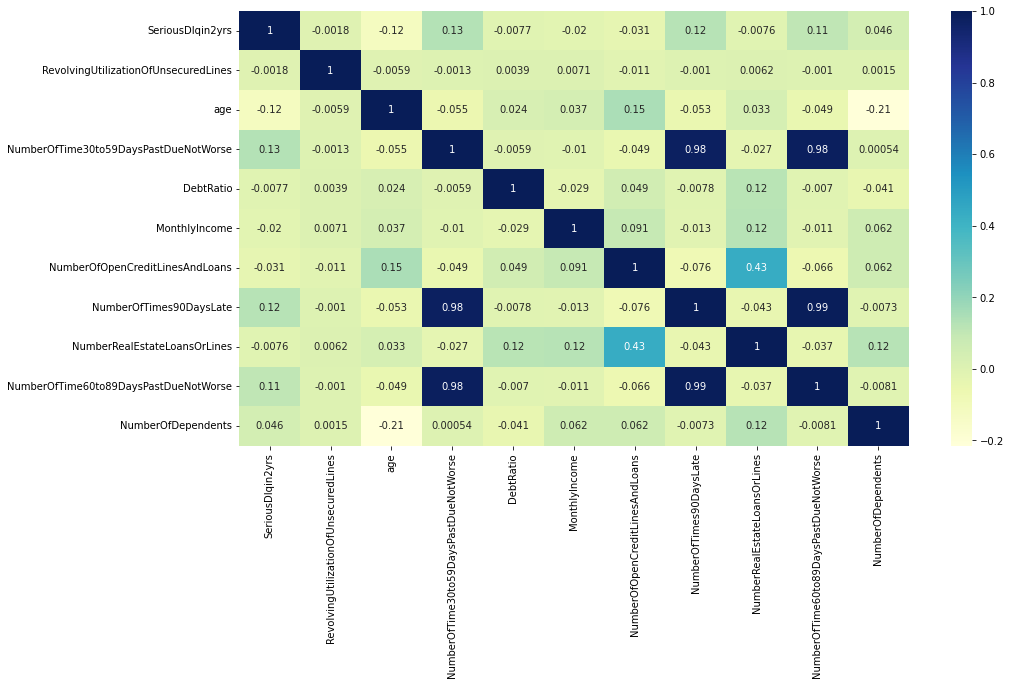

In [10]:
# Visualize correlation with heatmap
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,8)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu",
        annot=True,
        ax=ax);

In [11]:
# Correlation table
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(6)

,feature_1,feature_2,correlation
106,NumberOfTime60to89DaysPastDueNotWorse,NumberOfTimes90DaysLate,0.991409
86,NumberOfTimes90DaysLate,NumberOfTime60to89DaysPastDueNotWorse,0.991409
102,NumberOfTime60to89DaysPastDueNotWorse,NumberOfTime30to59DaysPastDueNotWorse,0.984535
42,NumberOfTime30to59DaysPastDueNotWorse,NumberOfTime60to89DaysPastDueNotWorse,0.984535
80,NumberOfTimes90DaysLate,NumberOfTime30to59DaysPastDueNotWorse,0.980489
40,NumberOfTime30to59DaysPastDueNotWorse,NumberOfTimes90DaysLate,0.980489


'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTime60to89DaysPastDueNotWorse' have strong correlation.\
However, since the three columns have different meanings, all of them should be kept.

### Visualize data

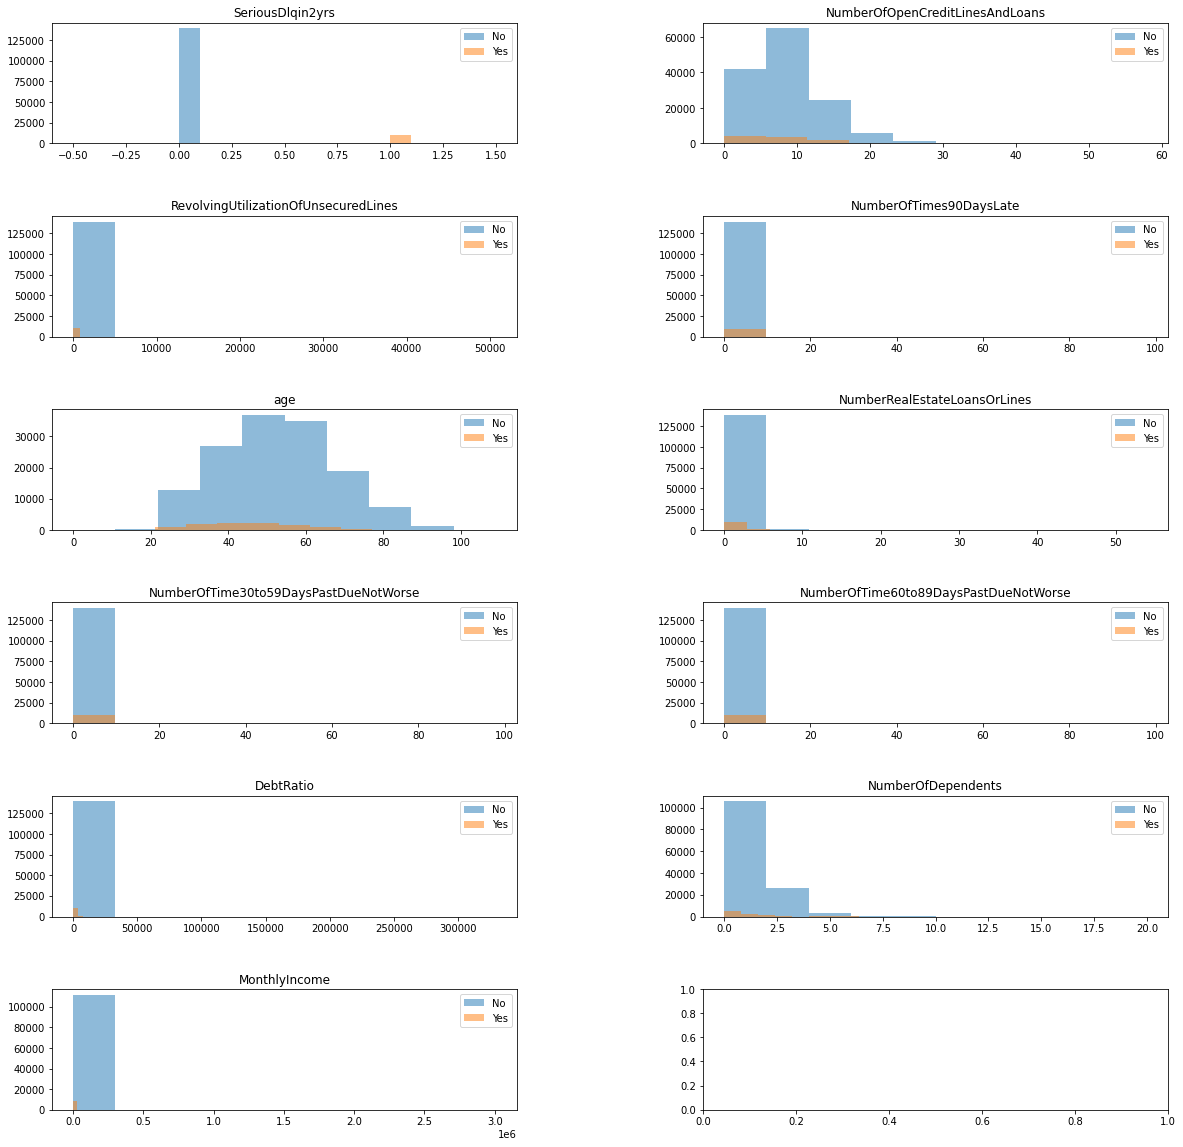

In [12]:
# Visualize data with histogram
# Yes: Person experienced 90 days past due delinquency or worse. (Input '1' for 'SeriousDlqin2yrs')
# No: Person did not experience 90 days past due delinquency or worse (Input '0' for 'SeriousDlqin2yrs')

fig, ax = plt.subplots(6, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
no = df[df.SeriousDlqin2yrs == 0]
yes = df[df.SeriousDlqin2yrs == 1]

for i in range(6):
    ax[i,0].hist(no.iloc[:, i], alpha=.5)
    ax[i,0].hist(yes.iloc[:, i], alpha=.5)
    ax[i,0].set_title(df.keys()[i])
    ax[i,0].legend(labels=['No', 'Yes'])
for i in range(5):
    ax[i,1].hist(no.iloc[:, i+6], alpha=.5)
    ax[i,1].hist(yes.iloc[:, i+6], alpha=.5)
    ax[i,1].set_title(df.keys()[i+6])
    ax[i,1].legend(labels=['No', 'Yes']);

It is difficult to find features because of outliers.

### Check balanced/imbalanced of the outcome variable

In [13]:
# Count the number of 'no'(0) and 'yes'(1) in 'SeriousDlqin2yrs'
df.SeriousDlqin2yrs.value_counts()

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64

In [14]:
# Percentage of  the number of 'no'(0) and 'yes'(1) in 'SeriousDlqin2yrs'
no = df.SeriousDlqin2yrs.value_counts()[0]/len(df)
yes = df.SeriousDlqin2yrs.value_counts()[1]/len(df)
print(f'Person did not experienced 90 days past due delinquency or worse: {no*100} % \nPerson experienced 90 days past due delinquency or worse: {yes*100} %')

Person did not experienced 90 days past due delinquency or worse: 93.30013186872034 % 
Person experienced 90 days past due delinquency or worse: 6.699868131279663 %


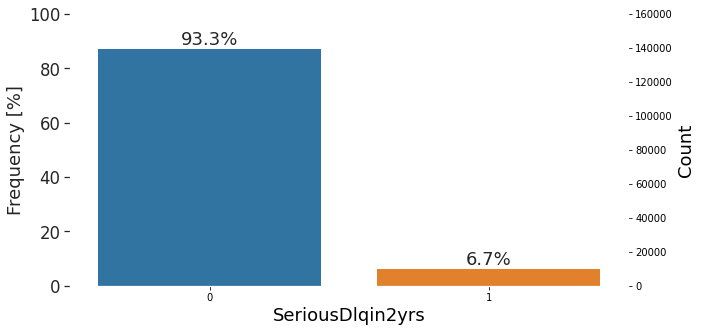

In [15]:
# Visualize 
ax = sns.countplot(x = df.SeriousDlqin2yrs)
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('SeriousDlqin2yrs', size=18)
ax.set_ylabel('Count', size=18)
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000);

ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

ax2.set_ylim(0,100)
ax2.grid(None)

### Analysis of each column

#### Functions definition

In [16]:
# function to compute IQR
def computeIQR(df, col):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
     
    print(IQR)
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print(f'lower_range is {lower_range}. upper_range is {upper_range}.')
    return lower_range, upper_range

In [17]:
# function to fill in NA with median 
def fillnaWithMedian(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df[col]

In [18]:
# function to replace outliers with median
def replaceOutlierWithMedian(df, col):
    lower_range, upper_range = computeIQR(df, col)
    newVal = []
    for val in df[col]:
        if val > lower_range and val < upper_range:
            newVal.append(val)
        else:
            newVal.append(df[col].median())

    df[col] = newVal
    return df[col]

In [19]:
# function to replace value below certain number with the number
def replaceBelowWithNum(df, col, num):
    newVal = []
    for val in df[col]:
        if val >= num:
            newVal.append(val)
        else:
            newVal.append(num)

    df[col] = newVal
    return df[col]

In [20]:
# function to replace value above certain number with the number
def replaceAboveWithNum(df, col, num):
    newVal = []
    for val in df[col]:
        if val <= num:
            newVal.append(val)
        else:
            newVal.append(num)

    df[col] = newVal
    return df[col]

In [21]:
# function to count NA
def naCounter(df, col):
    naCount = 1 - (df[col].count() / df.shape[0])
    print(f'{naCount * 100} % of {col} is na.')
    return df[df[col].isna()]

In [22]:
# function to create boxplot
def boxplot(df, col):
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel('Count')
    return plt.show()

In [23]:
# function to create histogram with classes of 'SeriousDlqin2yrs'
def histWithClasses(df, col):
    df.groupby('SeriousDlqin2yrs')[col].hist(alpha=0.8)
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(labels=['No', 'Yes'])
    return plt.show()

In [24]:
# function to replace the value '98' and '96' with median
def replace98or96WithMed(df, col):
    newVal = []
    med = df[col].median()
    for val in df[col]:
        if ((val == 98) or (val == 96)):
            newVal.append(med)
        else:
            newVal.append(val)
    df[col] = newVal
    return df[col]

#### MonthlyIncome with NA

In [25]:
naCounter(df, 'MonthlyIncome')

19.560080593877814 % of MonthlyIncome is na.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [26]:
df.MonthlyIncome.describe()

count    1.201700e+05
mean     6.675098e+03
std      1.438958e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [27]:
fillnaWithMedian(df,'MonthlyIncome')

0          9120.0
1          2600.0
2          3042.0
3          3300.0
4         63588.0
           ...   
149995     2100.0
149996     5584.0
149997     5400.0
149998     5716.0
149999     8158.0
Name: MonthlyIncome, Length: 149391, dtype: float64

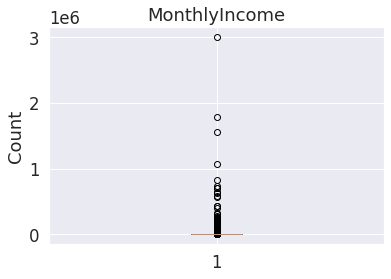

In [28]:
boxplot(df, 'MonthlyIncome')

There are outliers.

In [29]:
replaceOutlierWithMedian(df, 'MonthlyIncome')

3500.0
lower_range is -1350.0. upper_range is 12650.0.


0         9120.0
1         2600.0
2         3042.0
3         3300.0
4         5400.0
           ...  
149995    2100.0
149996    5584.0
149997    5400.0
149998    5716.0
149999    8158.0
Name: MonthlyIncome, Length: 149391, dtype: float64

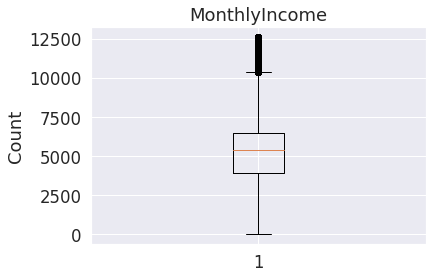

In [30]:
# After replacing outliers with median
boxplot(df, 'MonthlyIncome')

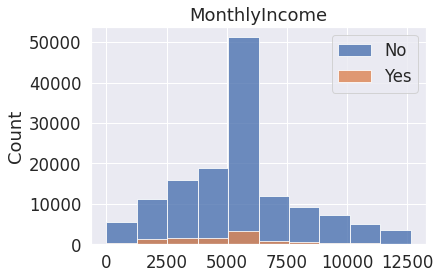

In [31]:
histWithClasses(df,'MonthlyIncome')

#### NumberOfDependents with NA

In [32]:
naCounter(df, 'NumberOfDependents')

2.5624033576319816 % of NumberOfDependents is na.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,5400.0,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,5400.0,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,5400.0,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,5400.0,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,5400.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,5400.0,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,5400.0,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,5400.0,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,5400.0,1,0,0,0,NaN


In [33]:
df.NumberOfDependents.describe()

count    145563.000000
mean          0.759863
std           1.116141
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [34]:
fillnaWithMedian(df,'NumberOfDependents')

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149995    0.0
149996    2.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

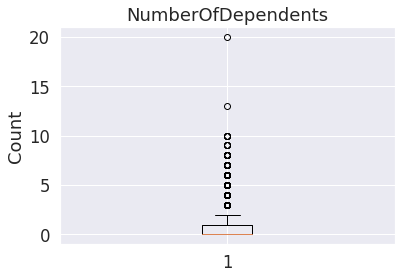

In [35]:
boxplot(df, 'NumberOfDependents')

In [36]:
df.NumberOfDependents[df.NumberOfDependents > 8].value_counts(ascending=True)

20.0    1
13.0    1
10.0    5
9.0     5
Name: NumberOfDependents, dtype: int64

Some ppl might put '10' instead of '1' by mistake.
Replace outliers with median.

In [37]:
replaceOutlierWithMedian(df, 'NumberOfDependents')

1.0
lower_range is -1.5. upper_range is 2.5.


0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149995    0.0
149996    2.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

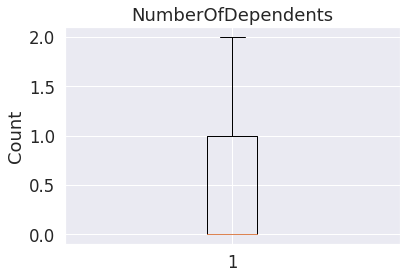

In [38]:
boxplot(df, 'NumberOfDependents')

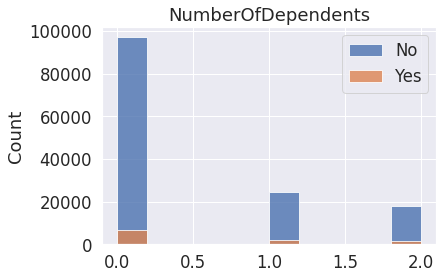

In [39]:
histWithClasses(df, 'NumberOfDependents')

Average number of children per family in USA (2020):	1.93

#### Age

In [40]:
df.age.describe()

count    149391.000000
mean         52.306237
std          14.725962
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

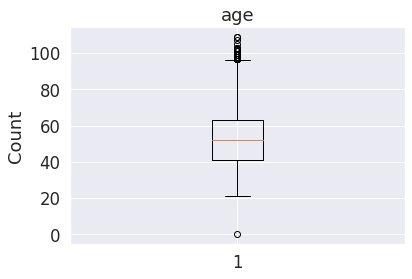

In [41]:
boxplot(df, 'age')

In [42]:
for i in range(20,30):
    print (i, len(df[df.age < i]))

20 1
21 1
22 163
23 531
24 1123
25 1906
26 2844
27 4030
28 5360
29 6916


In [43]:
for i in range(20,30):
    print (i, len(df[df.age < i]) - len(df[df.age < (i-1)]))

20 0
21 0
22 162
23 368
24 592
25 783
26 938
27 1186
28 1330
29 1556


Age is between 0 and 109.
There is one "0" input outlier. Except this outlier, the youngest is "22".
It can assumed that age under 22 is outliers and input errors. Replace it with "22".

In [44]:
replaceBelowWithNum(df, 'age', 22)

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 149391, dtype: int64

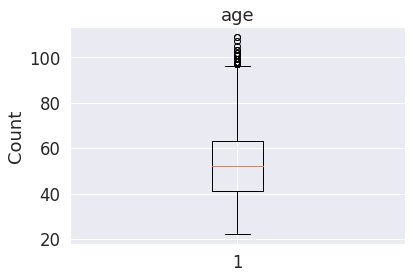

In [45]:
boxplot(df, 'age')

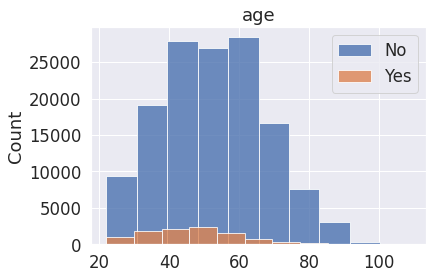

In [46]:
histWithClasses(df, 'age')

#### RevolvingUtilizationOfUnsecuredLines

In [47]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

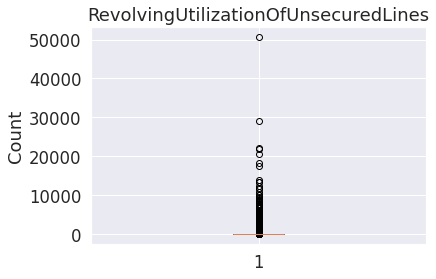

In [48]:
boxplot(df, 'RevolvingUtilizationOfUnsecuredLines')

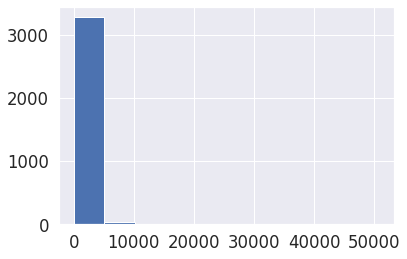

In [49]:
plt.hist(df.RevolvingUtilizationOfUnsecuredLines[df.RevolvingUtilizationOfUnsecuredLines > 1]);

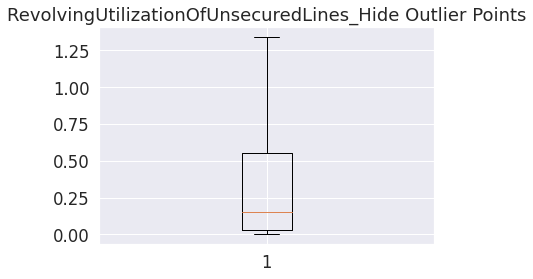

In [50]:
#boxplot w/o outlier
plt.boxplot(df['RevolvingUtilizationOfUnsecuredLines'], showfliers=False)
plt.title('RevolvingUtilizationOfUnsecuredLines_Hide Outlier Points');

In [51]:
# Replace number above 1 with 1
replaceAboveWithNum(df, 'RevolvingUtilizationOfUnsecuredLines', 1)

0         0.766127
1         0.957151
2         0.658180
3         0.233810
4         0.907239
            ...   
149995    0.040674
149996    0.299745
149997    0.246044
149998    0.000000
149999    0.850283
Name: RevolvingUtilizationOfUnsecuredLines, Length: 149391, dtype: float64

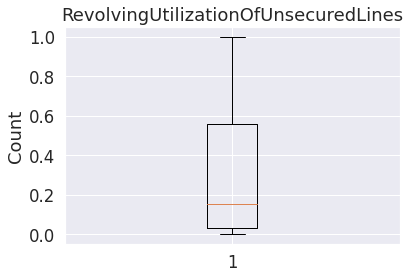

In [52]:
boxplot(df, 'RevolvingUtilizationOfUnsecuredLines')

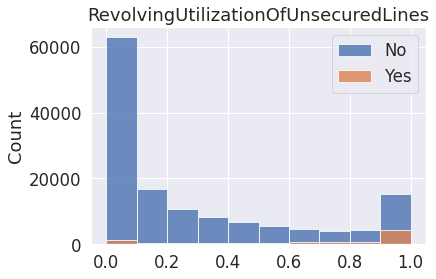

In [53]:
histWithClasses(df, 'RevolvingUtilizationOfUnsecuredLines')

#### NumberOfTime30to59DaysPastDueNotWorse

In [54]:
df.NumberOfTime30to59DaysPastDueNotWorse.value_counts()

0     125453
1      16033
2       4598
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30to59DaysPastDueNotWorse, dtype: int64

Outliers as "98" and "96"

In [55]:
replace98or96WithMed(df, 'NumberOfTime30to59DaysPastDueNotWorse')

0         2.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
149995    0.0
149996    0.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfTime30to59DaysPastDueNotWorse, Length: 149391, dtype: float64

In [56]:
df.NumberOfTime30to59DaysPastDueNotWorse.value_counts()

0.0     125678
1.0      16033
2.0       4598
3.0       1754
4.0        747
5.0        342
6.0        140
7.0         54
8.0         25
9.0         12
10.0         4
12.0         2
13.0         1
11.0         1
Name: NumberOfTime30to59DaysPastDueNotWorse, dtype: int64

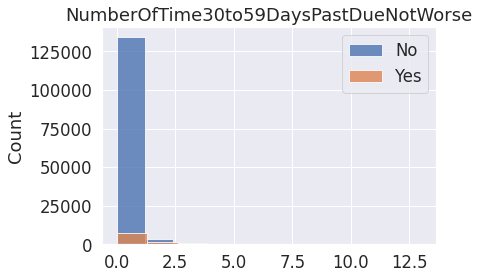

In [57]:
histWithClasses(df, 'NumberOfTime30to59DaysPastDueNotWorse')

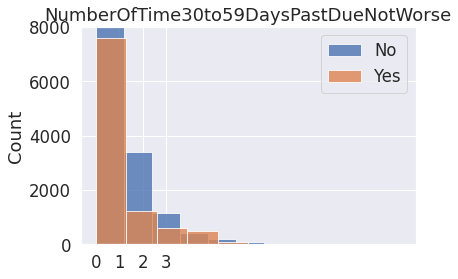

In [58]:
df.groupby('SeriousDlqin2yrs')['NumberOfTime30to59DaysPastDueNotWorse'].hist(alpha=0.8)
plt.title('NumberOfTime30to59DaysPastDueNotWorse')
plt.ylabel('Count')
plt.ylim(top = 8000)
plt.xticks(np.arange(0,4,1))
plt.legend(labels=['No', 'Yes']);

####  DebtRatio

In [59]:
df.DebtRatio.describe()

count    149391.000000
mean        354.436740
std        2041.843455
min           0.000000
25%           0.177441
50%           0.368234
75%           0.875279
max      329664.000000
Name: DebtRatio, dtype: float64

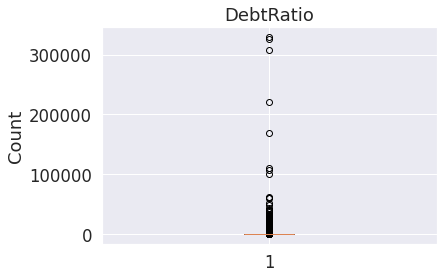

In [60]:
boxplot(df, 'DebtRatio');

In [61]:
df.DebtRatio[df.DebtRatio > 1]

6         5710.000000
8           46.000000
14         477.000000
16        2058.000000
25           1.595253
             ...     
149976      60.000000
149977     349.000000
149984      25.000000
149992    4132.000000
149997    3870.000000
Name: DebtRatio, Length: 35130, dtype: float64

More than 1.0 is possible. Replace value above 1.0 with 1.0 to group them as people who are have more debt than income.

In [62]:
replaceAboveWithNum(df, 'DebtRatio', 1)

0         0.802982
1         0.121876
2         0.085113
3         0.036050
4         0.024926
            ...   
149995    0.225131
149996    0.716562
149997    1.000000
149998    0.000000
149999    0.249908
Name: DebtRatio, Length: 149391, dtype: float64

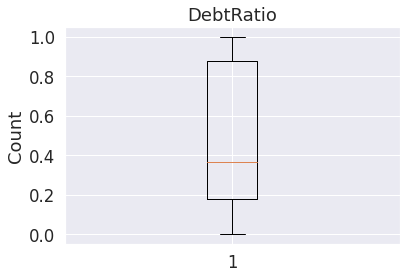

In [63]:
boxplot(df, 'DebtRatio')

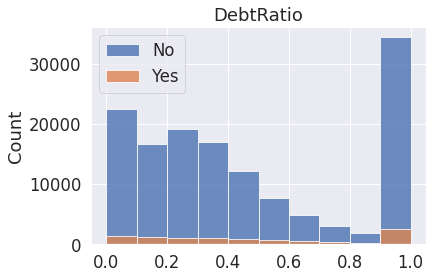

In [64]:
histWithClasses(df, 'DebtRatio')

#### NumberOfOpenCreditLinesAndLoans	

In [65]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    149391.000000
mean          8.480892
std           5.136515
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

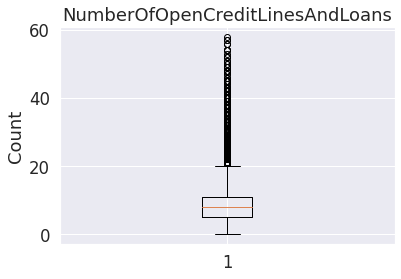

In [66]:
boxplot(df, 'NumberOfOpenCreditLinesAndLoans')

In [67]:
computeIQR(df,'NumberOfOpenCreditLinesAndLoans')

6.0
lower_range is -4.0. upper_range is 20.0.


(-4.0, 20.0)

Theere is no limit for this feature. Replace points above 20 with 20.

In [68]:
replaceAboveWithNum(df,'NumberOfOpenCreditLinesAndLoans', 20)

0         13
1          4
2          2
3          5
4          7
          ..
149995     4
149996     4
149997    18
149998     4
149999     8
Name: NumberOfOpenCreditLinesAndLoans, Length: 149391, dtype: int64

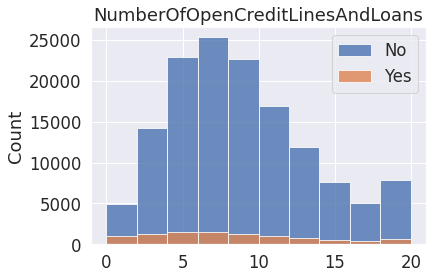

In [69]:
histWithClasses(df,'NumberOfOpenCreditLinesAndLoans')

#### NumberOfTimes90DaysLate

In [70]:
df.NumberOfTimes90DaysLate.describe()

count    149391.000000
mean          0.238120
std           3.826165
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

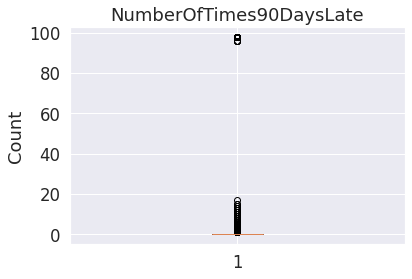

In [71]:
boxplot(df, 'NumberOfTimes90DaysLate')

In [72]:
df.NumberOfTimes90DaysLate.value_counts()

0     141108
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

Data points are between 0 and 17.
Outliers are "98" and "96". Replace them with median.

In [73]:
replace98or96WithMed(df, 'NumberOfTimes90DaysLate')

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
149995    0.0
149996    0.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfTimes90DaysLate, Length: 149391, dtype: float64

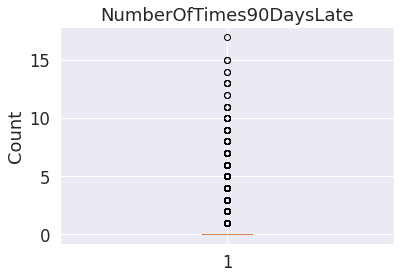

In [74]:
boxplot(df, 'NumberOfTimes90DaysLate')

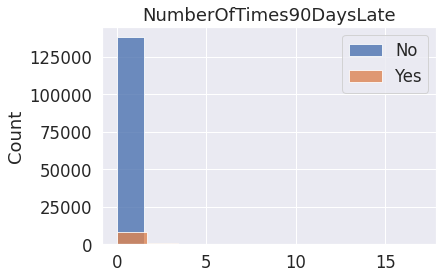

In [75]:
histWithClasses(df, 'NumberOfTimes90DaysLate')

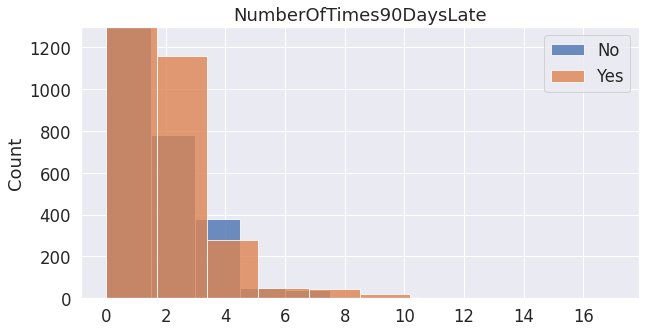

In [76]:
plt.figure(figsize=(10,5))
df.groupby('SeriousDlqin2yrs')['NumberOfTimes90DaysLate'].hist(alpha=0.8)
plt.title('NumberOfTimes90DaysLate')
plt.ylabel('Count')
plt.ylim(top = 1300)
plt.xticks(np.arange(0,18,2))
plt.legend(labels=['No', 'Yes']);

#### NumberRealEstateLoansOrLines

In [77]:
df.NumberRealEstateLoansOrLines.describe()

count    149391.000000
mean          1.022391
std           1.130196
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

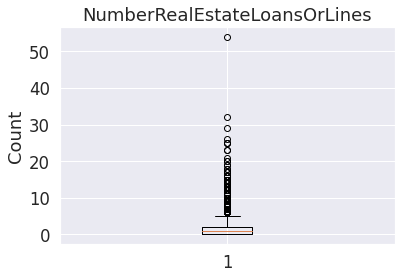

In [78]:
boxplot(df, 'NumberRealEstateLoansOrLines')

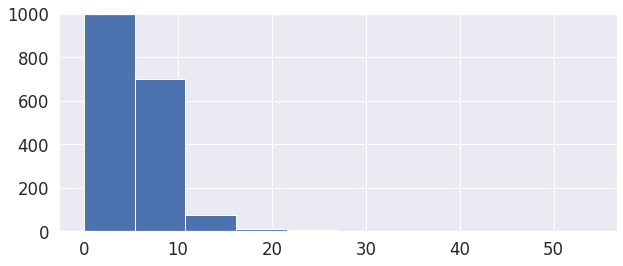

In [79]:
plt.figure(figsize=(10,4))
plt.ylim(top=1000)
plt.hist(df.NumberRealEstateLoansOrLines);

In [80]:
replaceOutlierWithMedian(df, 'NumberRealEstateLoansOrLines')

2.0
lower_range is -3.0. upper_range is 5.0.


0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
149995    1.0
149996    1.0
149997    1.0
149998    0.0
149999    2.0
Name: NumberRealEstateLoansOrLines, Length: 149391, dtype: float64

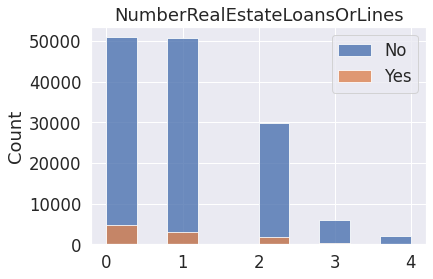

In [81]:
histWithClasses(df, 'NumberRealEstateLoansOrLines')

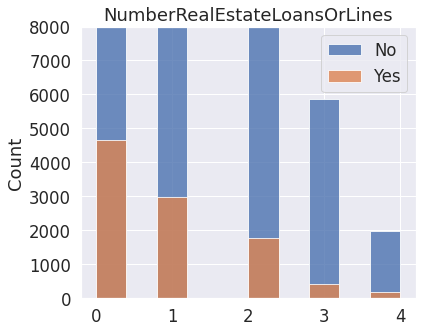

In [82]:
plt.figure(figsize=(6,5))
df.groupby('SeriousDlqin2yrs')['NumberRealEstateLoansOrLines'].hist(alpha=0.8)
plt.title('NumberRealEstateLoansOrLines')
plt.ylabel('Count')
plt.ylim(top = 8000)
plt.xticks(np.arange(0,5,1))
plt.legend(labels=['No', 'Yes']);

#### NumberOfTime60to89DaysPastDueNotWorse

In [83]:
df.NumberOfTime60to89DaysPastDueNotWorse.value_counts()

0     141831
1       5731
2       1118
3        318
98       220
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60to89DaysPastDueNotWorse, dtype: int64

In [84]:
replace98or96WithMed(df, 'NumberOfTime60to89DaysPastDueNotWorse')

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
149995    0.0
149996    0.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfTime60to89DaysPastDueNotWorse, Length: 149391, dtype: float64

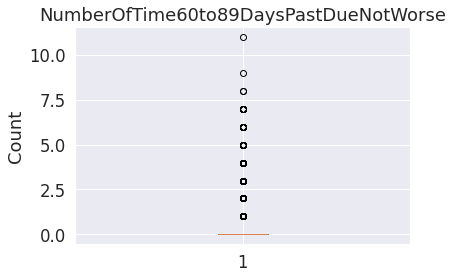

In [85]:
boxplot(df, 'NumberOfTime60to89DaysPastDueNotWorse')

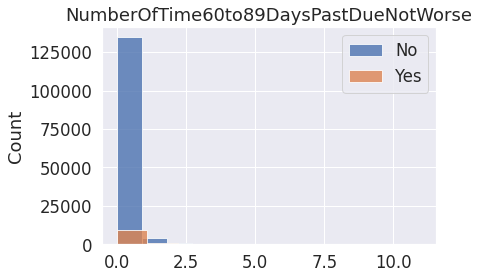

In [86]:
histWithClasses(df, 'NumberOfTime60to89DaysPastDueNotWorse')

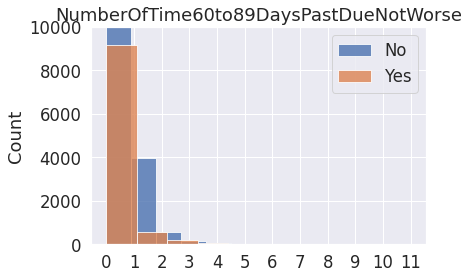

In [87]:
#plt.figure(figsize=(6,5))
df.groupby('SeriousDlqin2yrs')['NumberOfTime60to89DaysPastDueNotWorse'].hist(alpha=0.8)
plt.title('NumberOfTime60to89DaysPastDueNotWorse')
plt.ylabel('Count')
plt.ylim(top = 10000)
plt.xticks(np.arange(0,12,1))
plt.legend(labels=['No', 'Yes']);

### Visualize all features without outliers.

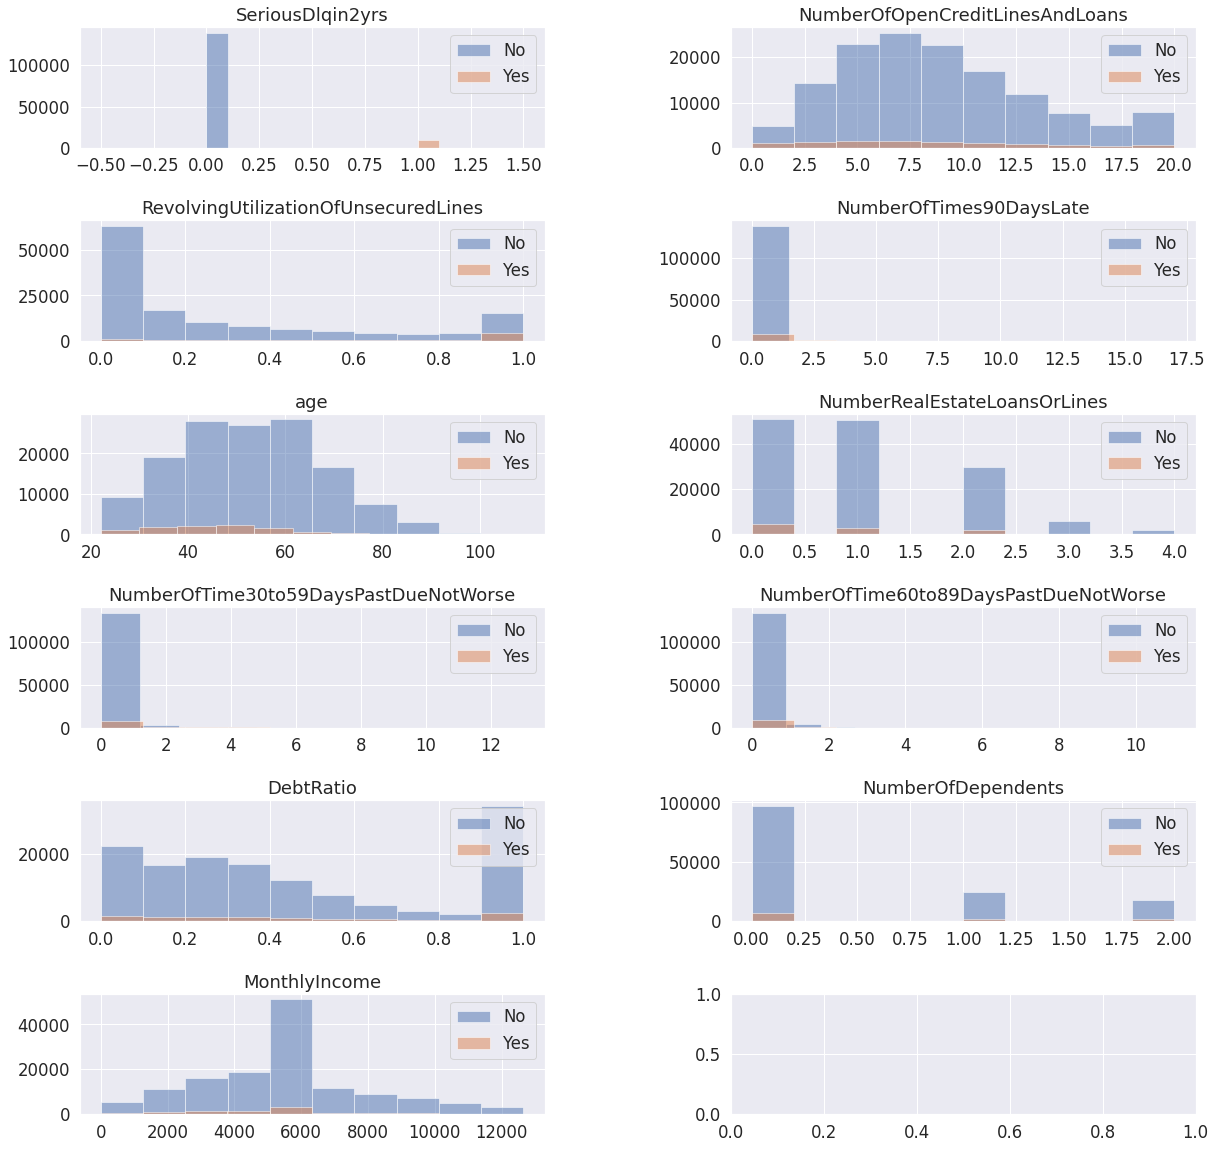

In [88]:
fig, ax = plt.subplots(6, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
no = df[df.SeriousDlqin2yrs == 0]
yes = df[df.SeriousDlqin2yrs == 1]

for i in range(6):
    ax[i,0].hist(no.iloc[:, i], alpha=.5)
    ax[i,0].hist(yes.iloc[:, i], alpha=.5)
    ax[i,0].set_title(df.keys()[i])
    ax[i,0].legend(labels=['No', 'Yes'])
for i in range(5):
    ax[i,1].hist(no.iloc[:, i+6], alpha=.5)
    ax[i,1].hist(yes.iloc[:, i+6], alpha=.5)
    ax[i,1].set_title(df.keys()[i+6])
    ax[i,1].legend(labels=['No', 'Yes']);

### Rebalance the outcome variable

In [89]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=0)
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_smote, y_smote = sm.fit_resample(X, y)

In [90]:
balanced_df = X_smote
balanced_df.insert(0, 'SeriousDlqin2yrs', y_smote)
balanced_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,1.0,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0.0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0.0,0.0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0.0,0.0,0.0,0.0
4,0,0.907239,49,1.0,0.024926,5400.0,7,0.0,1.0,0.0,0.0


### Visualize rebalanced data

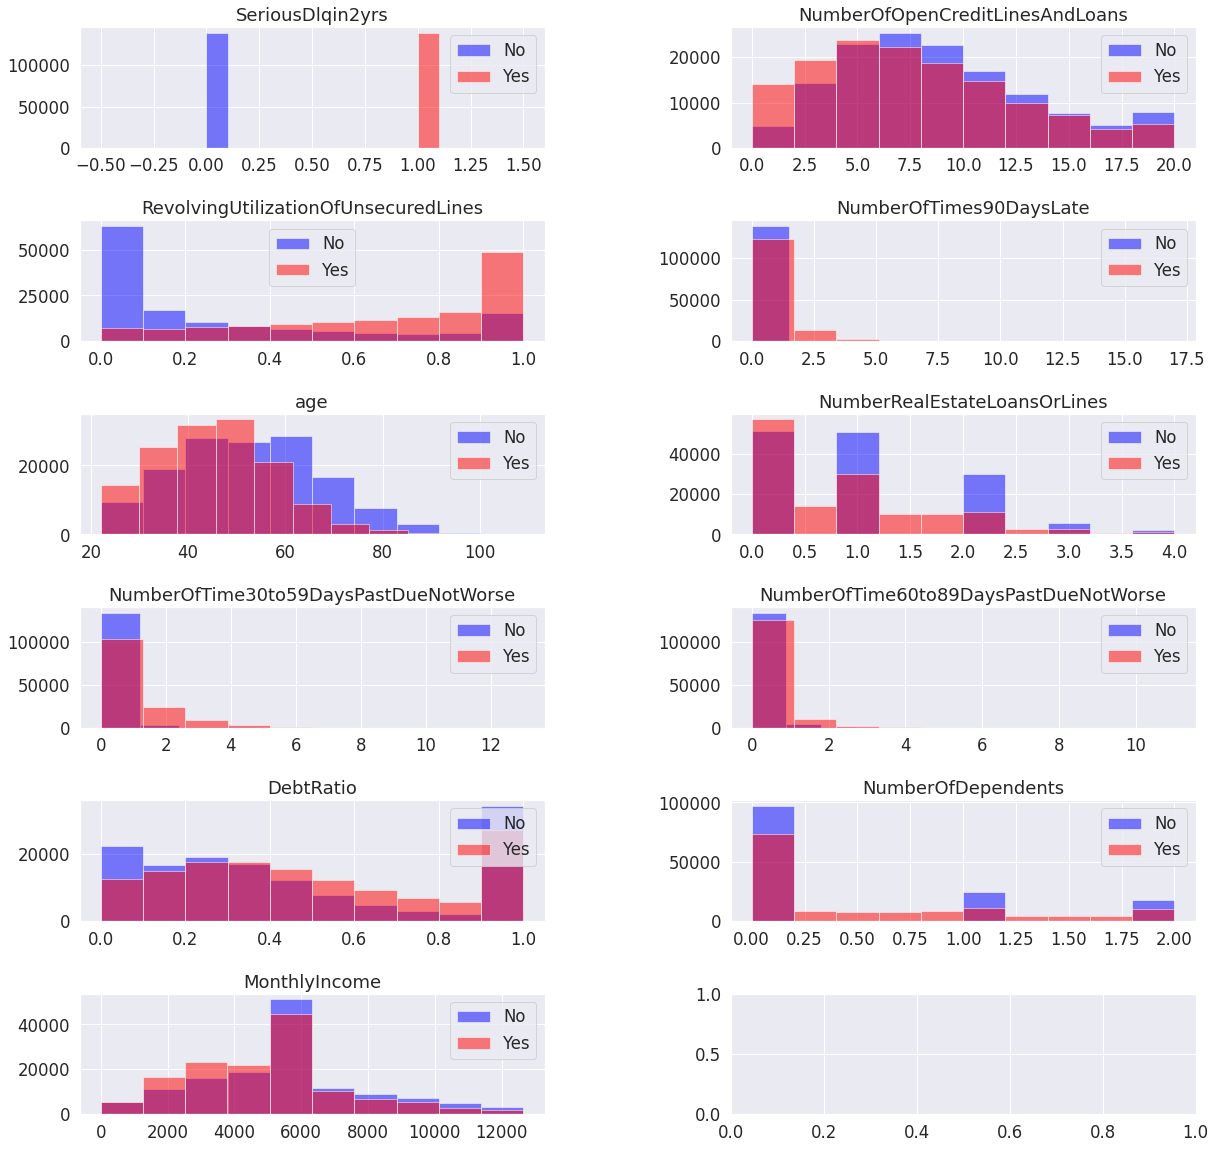

In [91]:
fig, ax = plt.subplots(6, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
no = balanced_df[balanced_df.SeriousDlqin2yrs == 0]
yes = balanced_df[balanced_df.SeriousDlqin2yrs == 1]

for i in range(6):
    ax[i,0].hist(no.iloc[:, i], alpha=.5, color='blue')
    ax[i,0].hist(yes.iloc[:, i], alpha=.5, color='red')
    ax[i,0].set_title(balanced_df.keys()[i])
    ax[i,0].legend(labels=['No', 'Yes'])
for i in range(5):
    ax[i,1].hist(no.iloc[:, i+6], alpha=.5, color='blue')
    ax[i,1].hist(yes.iloc[:, i+6], alpha=.5, color='red')
    ax[i,1].set_title(balanced_df.keys()[i+6])
    ax[i,1].legend(labels=['No', 'Yes']);

### Exploring corelations of rebalanced data with heatmap

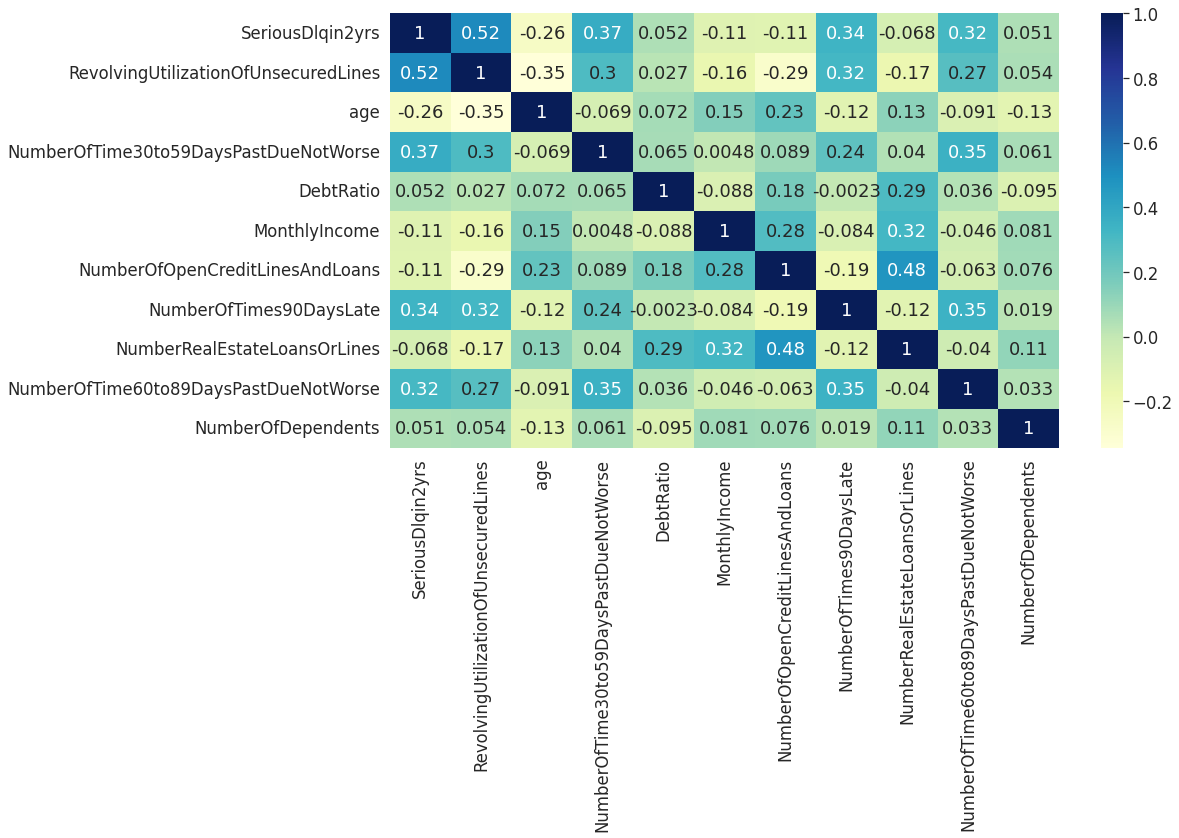

In [92]:
corr = balanced_df.corr()

fig, ax = plt.subplots(figsize=(15,8)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu",
        annot=True,
        ax=ax);

In [93]:
# Features which have the strongest correlation
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(6)

,feature_1,feature_2,correlation
1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,0.518131
11,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs,0.518131
74,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,0.477448
94,NumberRealEstateLoansOrLines,NumberOfOpenCreditLinesAndLoans,0.477448
3,SeriousDlqin2yrs,NumberOfTime30to59DaysPastDueNotWorse,0.371552
33,NumberOfTime30to59DaysPastDueNotWorse,SeriousDlqin2yrs,0.371552


The features which has the strongest correlation with'SeriousDlqin2yrs' is 'RevolvingUtilizationOfUnsecuredLines' and 'NumberOfTime30to59DaysPastDueNotWorse'.

In [94]:
# Features which have weakest correlation
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=True, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(6)

,feature_1,feature_2,correlation
23,age,RevolvingUtilizationOfUnsecuredLines,-0.345515
13,RevolvingUtilizationOfUnsecuredLines,age,-0.345515
17,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,-0.286029
67,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,-0.286029
2,SeriousDlqin2yrs,age,-0.260526
22,age,SeriousDlqin2yrs,-0.260526


The features which has the weakest correlation with'SeriousDlqin2yrs' is 'age'.

--------